In [2]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df  = pd.read_csv("music_dataset_mod.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [5]:
df["Genre"].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

<Axes: xlabel='Genre', ylabel='count'>

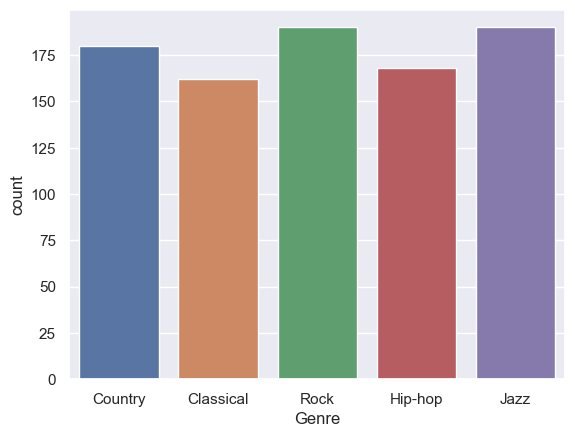

In [6]:
sns.countplot(data=df, x='Genre')

In [7]:
dfcopy = df.copy()
dfcopy['Genre'].dropna()
target = dfcopy['Genre']
features = dfcopy.drop(['Genre'], axis=1)
features

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986
...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517


In [8]:
le = LabelEncoder()
genre_num = le.fit_transform(target)

In [9]:
correlation = features.assign(Genre = genre_num)
correlation.corr()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
Tempo,1.000000,-0.028506,0.006061,0.055525,-0.088609,-0.004698,0.031037,0.404134,0.060776,0.049126,0.044593,-0.040985,0.106134
Dynamics Range,-0.028506,1.000000,0.032957,-0.034168,0.129264,-0.181794,0.037519,-0.016212,-0.361773,-0.353070,-0.024559,0.017175,-0.357165
Vocal Presence,0.006061,0.032957,1.000000,0.018975,-0.049472,0.005875,0.037544,0.059467,0.014141,0.022111,0.017109,-0.053248,-0.002553
Percussion Strength,0.055525,-0.034168,0.018975,1.000000,-0.029019,0.001096,-0.039438,0.535980,0.096691,0.087168,-0.013822,0.025036,0.103091
String Instrument Detection,-0.088609,0.129264,-0.049472,-0.029019,1.000000,-0.103855,-0.090580,-0.085489,-0.139875,-0.143452,-0.023470,-0.003873,-0.132867
Electronic Element Presence,-0.004698,-0.181794,0.005875,0.001096,-0.103855,1.000000,0.053261,0.043069,0.211275,0.189626,0.035596,-0.053259,0.162845
Rhythm Complexity,0.031037,0.037519,0.037544,-0.039438,-0.090580,0.053261,1.000000,0.535725,0.037149,0.026348,0.001242,-0.004973,0.049840
Drums Influence,0.404134,-0.016212,0.059467,0.535980,-0.085489,0.043069,0.535725,1.000000,0.094685,0.078875,0.029679,-0.012037,0.127096
Distorted Guitar,0.060776,-0.361773,0.014141,0.096691,-0.139875,0.211275,0.037149,0.094685,1.000000,0.965104,0.012690,-0.052988,0.473240
Metal Frequencies,0.049126,-0.353070,0.022111,0.087168,-0.143452,0.189626,0.026348,0.078875,0.965104,1.000000,0.020836,-0.055322,0.460327


<Axes: >

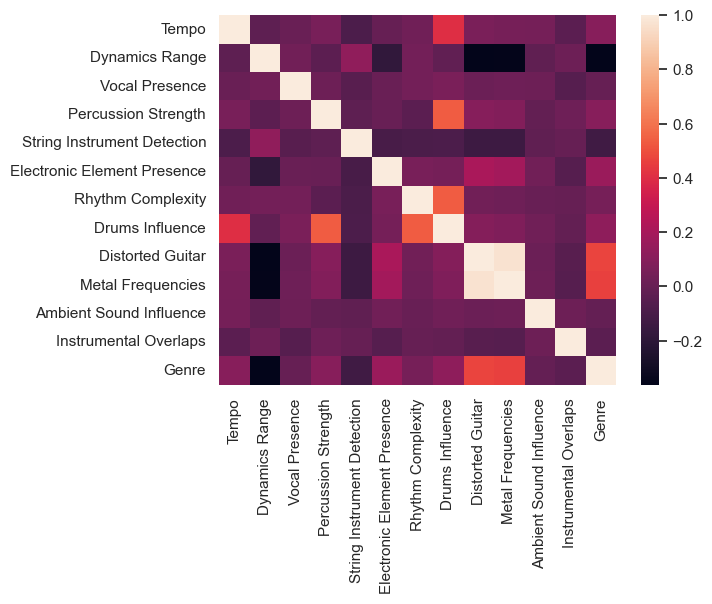

In [10]:
sns.heatmap(correlation.corr())

In [11]:
s = StandardScaler()
scaled = s.fit_transform(features)
scaled

array([[-0.33482725,  0.63436169,  0.05208189, ...,  0.75741691,
         1.55012453,  0.15255378],
       [-0.22995925,  1.2753904 ,  1.51910888, ..., -1.46687879,
        -1.1403267 , -1.17801899],
       [ 0.36497873,  0.3509061 ,  0.48145573, ...,  1.25151547,
         1.50542246, -0.82469961],
       ...,
       [ 0.02826079,  0.2640849 , -0.61709527, ...,  1.51040079,
        -1.5425711 ,  0.86782317],
       [-1.2305303 , -1.54342199,  0.37666547, ...,  0.24177316,
        -0.98885258, -0.84500787],
       [-2.55870515, -0.77059454,  0.38400882, ..., -0.08503238,
         1.2446904 ,  0.99368184]])

In [12]:
pca = PCA()
pca.fit_transform(features)

array([[-38.06932337, -11.5854155 , -43.16366469, ..., -17.87605509,
         -8.8599782 ,  -6.36561386],
       [ 71.4475764 , -56.79924311, -56.33079473, ...,  -5.00071283,
          0.62683672,  -1.35245107],
       [-61.97020139,  -6.12055837, -18.20264809, ..., -18.61505092,
         -5.0146273 ,   4.35811924],
       ...,
       [-34.21671298,  85.98544591, -36.52211302, ..., -12.31749454,
         16.47570621,   3.08867227],
       [-25.30561392,  30.66822081,  41.98051091, ...,  23.5074293 ,
         -2.91238515,  -9.06123241],
       [  7.66781584, -13.21740491,   2.87102655, ...,  17.9685025 ,
        -14.50263663,   5.20808038]])

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
cumulative_variance

array([0.2403266 , 0.35826564, 0.46976121, 0.56524573, 0.6585029 ,
       0.75012027, 0.83709281, 0.91860905, 0.9611716 , 0.98884936,
       0.99618773, 1.        ])

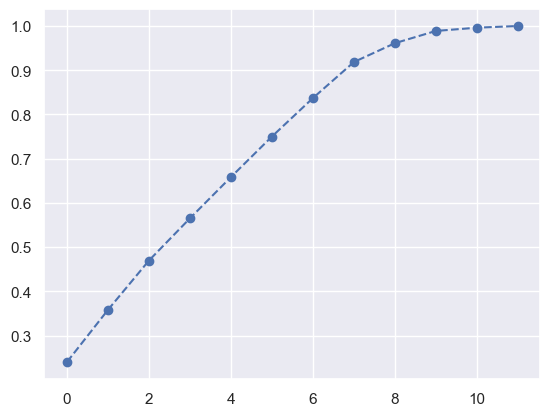

In [14]:
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')


In [15]:
pca = PCA(n_components=8)
pca.fit_transform(scaled)
X_train, X_test, y_train, y_test = train_test_split(pca.fit_transform(scaled)[:,:-1], genre_num, test_size=0.3, random_state=42)
X_test

array([[-0.99540612, -1.4533089 , -0.92586986, ...,  0.72066062,
        -1.25557693,  0.46655852],
       [-0.89680202,  1.49095245,  1.85416816, ...,  0.30514045,
         1.24225484,  0.5133105 ],
       [ 1.11181952, -1.47492901, -1.71783948, ..., -0.04593105,
        -0.03938494,  0.9688841 ],
       ...,
       [ 1.33045223,  1.45446479, -1.45774384, ..., -0.42864288,
        -0.65886669,  0.62226393],
       [-0.18357139,  0.03029862, -0.16415416, ..., -0.05719609,
        -0.39172983, -1.963449  ],
       [ 0.26465591,  0.70694046, -2.03617125, ...,  1.38196761,
         0.42851995,  0.74598761]])

In [16]:
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train,y_train)
pred = logr.predict(X_test)
acc = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)
acc

/Users/alinaim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alinaim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alinaim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.49666666666666665

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, genre_num, test_size=0.3, random_state=42)
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train,y_train)
pred = logr.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.5133333333333333

In [18]:
features[:10]

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986
5,125.396416,55.489531,36.660016,42.622754,28.114258,49.198285,20.268958,53.603162,51.719769,46.748945,40.072584,54.253725
6,126.266289,33.170632,34.431812,31.261415,47.921501,118.172945,13.811310,53.252894,45.404283,50.940339,94.448406,82.865538
7,102.872722,37.401685,58.255022,65.082390,107.201075,60.415823,68.352576,83.943276,44.401688,52.935285,66.928026,4.293606
8,103.651296,69.983670,98.097303,77.514832,54.307746,17.600221,3.856743,50.365287,70.140810,53.438141,7.108158,1.772224
9,111.256855,41.987729,102.047297,89.803807,93.423110,14.978251,11.667792,80.936464,43.423225,52.918957,44.509521,26.362239


In [19]:
logr.predict(features[:10])

array([4, 0, 4, 2, 1, 1, 2, 3, 1, 1])

In [20]:
le.inverse_transform(logr.predict(features[:10]))

array(['Rock', 'Classical', 'Rock', 'Hip-hop', 'Country', 'Country',
       'Hip-hop', 'Jazz', 'Country', 'Country'], dtype=object)

In [21]:
target[:10]

0      Country
1    Classical
2         Rock
3      Hip-hop
4      Country
5         Rock
6      Hip-hop
7      Country
8      Country
9      Country
Name: Genre, dtype: object

In [22]:
missing = df[df['Genre'].isnull()]
finalpred = logr.predict(missing.drop(['Genre'], axis=1))
finalpred = le.inverse_transform(finalpred)
finalpred

array(['Classical', 'Country', 'Country', 'Hip-hop', 'Rock', 'Jazz',
       'Jazz', 'Jazz', 'Hip-hop', 'Country', 'Jazz', 'Jazz', 'Rock',
       'Hip-hop', 'Rock', 'Country', 'Hip-hop', 'Jazz', 'Hip-hop', 'Rock',
       'Classical', 'Rock', 'Classical', 'Jazz', 'Rock', 'Jazz',
       'Classical', 'Hip-hop', 'Classical', 'Jazz', 'Classical',
       'Country', nan, 'Hip-hop', 'Rock', 'Rock', 'Hip-hop', 'Classical',
       'Hip-hop', 'Country', 'Jazz', 'Classical', 'Classical', 'Country',
       'Rock', 'Hip-hop', 'Hip-hop', 'Jazz', 'Classical', 'Jazz', 'Rock',
       'Jazz', 'Classical', 'Country', 'Rock', 'Jazz', 'Hip-hop', 'Rock',
       'Country', 'Country', 'Hip-hop', 'Classical', 'Country', 'Jazz',
       'Country', 'Rock', 'Jazz', 'Classical', 'Country', 'Hip-hop',
       'Jazz', 'Country', 'Country', 'Rock', 'Classical', 'Rock', 'Jazz',
       'Jazz', 'Country', 'Country', 'Rock', 'Classical', 'Rock',
       'Classical', 'Classical', 'Rock', 'Classical', 'Country',
       'Country

In [29]:
df.iloc.__setitem__((missing.index,12),finalpred)
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Country
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [33]:
finalpred, missing.index

(array(['Classical', 'Country', 'Country', 'Hip-hop', 'Rock', 'Jazz',
        'Jazz', 'Jazz', 'Hip-hop', 'Country', 'Jazz', 'Jazz', 'Rock',
        'Hip-hop', 'Rock', 'Country', 'Hip-hop', 'Jazz', 'Hip-hop', 'Rock',
        'Classical', 'Rock', 'Classical', 'Jazz', 'Rock', 'Jazz',
        'Classical', 'Hip-hop', 'Classical', 'Jazz', 'Classical',
        'Country', nan, 'Hip-hop', 'Rock', 'Rock', 'Hip-hop', 'Classical',
        'Hip-hop', 'Country', 'Jazz', 'Classical', 'Classical', 'Country',
        'Rock', 'Hip-hop', 'Hip-hop', 'Jazz', 'Classical', 'Jazz', 'Rock',
        'Jazz', 'Classical', 'Country', 'Rock', 'Jazz', 'Hip-hop', 'Rock',
        'Country', 'Country', 'Hip-hop', 'Classical', 'Country', 'Jazz',
        'Country', 'Rock', 'Jazz', 'Classical', 'Country', 'Hip-hop',
        'Jazz', 'Country', 'Country', 'Rock', 'Classical', 'Rock', 'Jazz',
        'Jazz', 'Country', 'Country', 'Rock', 'Classical', 'Rock',
        'Classical', 'Classical', 'Rock', 'Classical', 'Country',
 